In [74]:
import numpy as np


In [75]:
R = 5
X, Y = np.meshgrid( np.linspace(-R, R, 11), np.linspace(-R, R, 11) )
F = (1 - (X**2+Y**2)/(R**2))


In [83]:
x1, y1 = np.meshgrid( np.linspace(-R, R, 31), np.linspace(-R, R, 31) )
x = x1.ravel()
y = y1.ravel()


In [84]:
F_interp = np.zeros(x.shape[0])
xvalues = X[0,:].ravel()
yvalues = Y[:,0].ravel()

default_value = 0

for i in range(x.shape[0]):
    xdiff = xvalues - x[i]
    xb_ind = np.where(xdiff>=0)[0][0]
    xa_ind = max( xb_ind-1, 0 )

    #if xb_ind==0:
    #    #raise ValueError('x coordinate is outside the interpolation box')
    #    F_interp[i] = default_value
    #    continue

    xa = xvalues[ xa_ind ]
    xb = xvalues[ xb_ind ]

    ydiff = yvalues - y[i]
    yb_ind = np.where(ydiff>=0)[0][0]
    ya_ind = max(yb_ind-1, 0)

    
    #if yb_ind==0:
    #    #raise ValueError('y coordinate is outside the interpolation box')
    #    F_interp[i] = default_value
    #    continue

    yb = yvalues[ yb_ind ]
    ya = yvalues[ ya_ind ]


    Faa = F[xa_ind, ya_ind]
    Fab = F[xa_ind, yb_ind]
    Fba = F[xb_ind, ya_ind]
    Fbb = F[xb_ind, yb_ind]


    #the four points for the interpolation are 
    #
    #   (xa, yb)                 P1       (xb,yb)
    #       O -------------------+--------- O 
    #       |     xdiff(xa)      | xdiff(xb)|
    #       |                    |          |
    #       |                    O          |
    #       |                    | (x,y)    |
    #       |                    |          |
    #       |           ydiff(ya)|          |
    #       |                    |          |
    #       |                    |          |
    #       O -------------------+--------- O 
    #   (xa, ya)                  P2      (xb,ya)
    #

    if xb_ind>0:
        wx2 = (1- xdiff[xb_ind]/(xb-xa))
    else:
        wx2 = 0
    wx1 = 1-wx2

    P1 = Fab * wx1 + Fbb * wx2
    P2 = Faa * wx1 + Fba * wx2

    if yb_ind>0: 
        wy2 = (1- ydiff[yb_ind]/(yb-ya))
    else:
        wy2 = 0        
    wy1 = 1-wy2
    F_interp[i] = P1*wy2 + P2*wy1



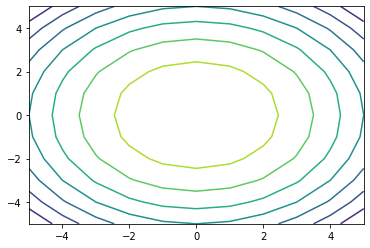

In [85]:
import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D
#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
#ax.plot_surface(x1, y1, np.reshape(F_interp, x1.shape))
plt.contour(x1, y1, np.reshape(F_interp, x1.shape))